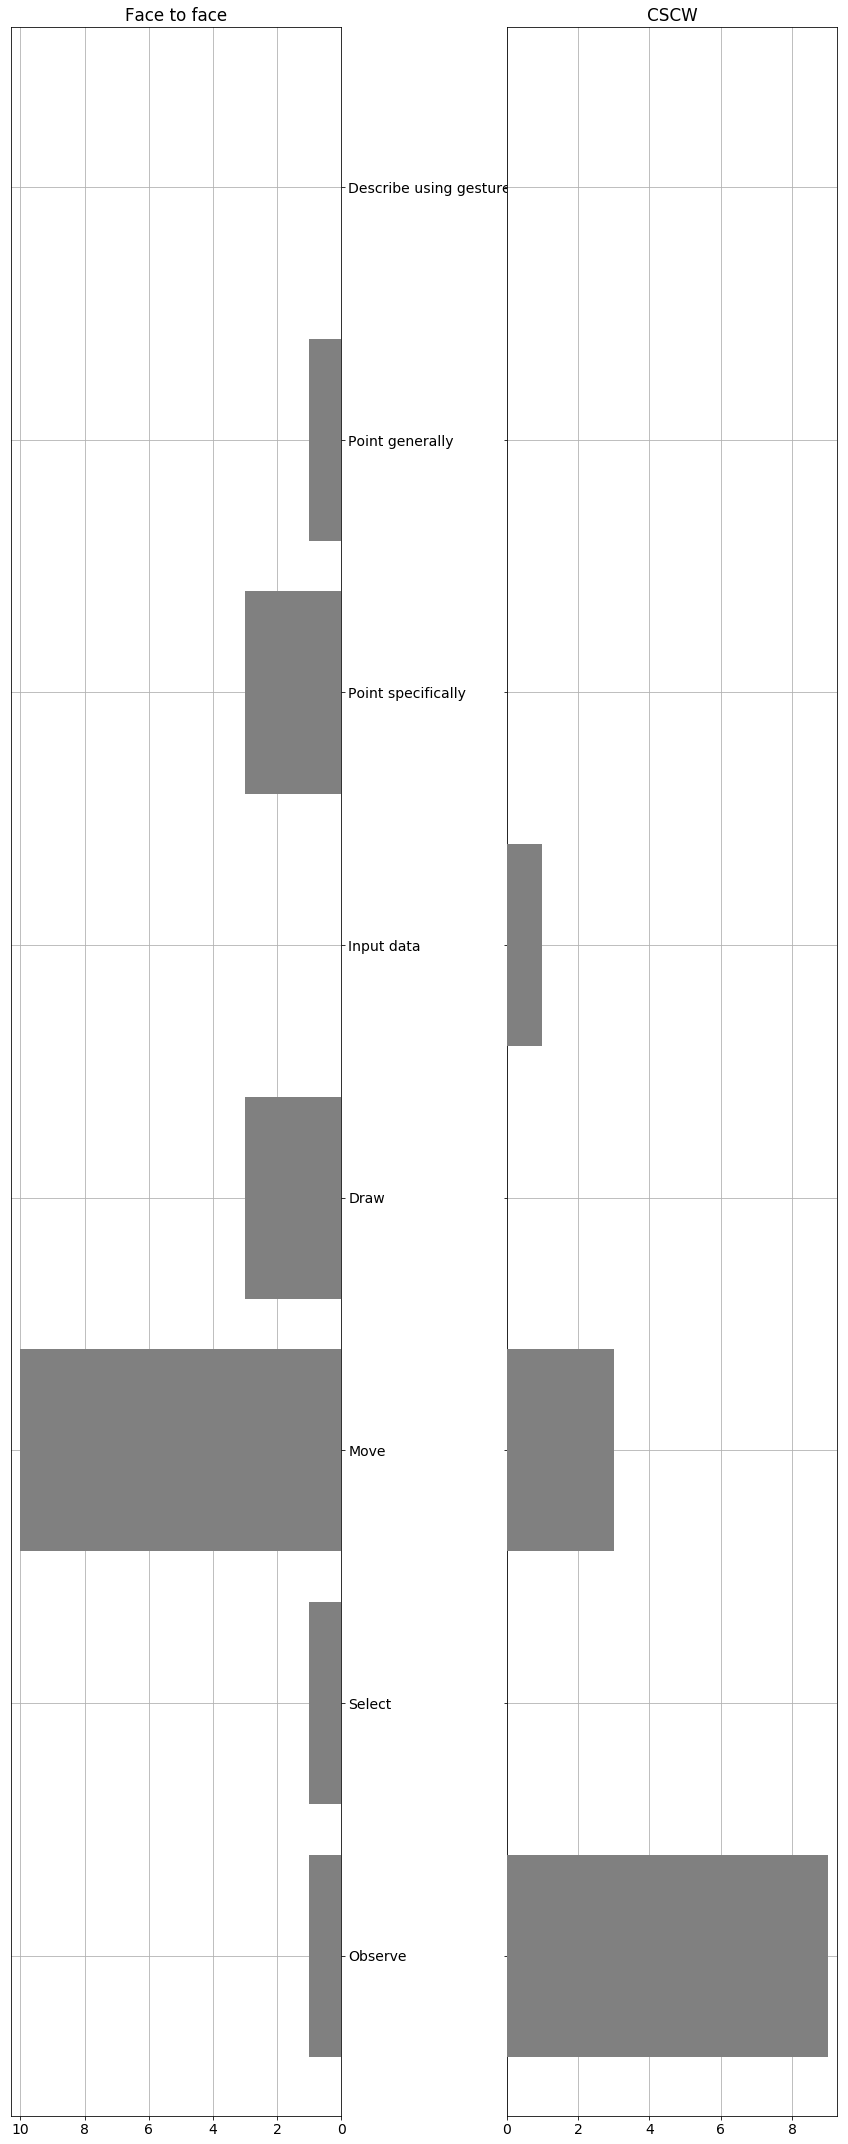

In [81]:
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size':14})
import matplotlib.pyplot as plt 
countSubplot = 5
plt.rcParams["figure.figsize"]=[12,6*countSubplot]
colorF2F = '#8BA6FF'
colorCSCW = '#CC6C52'

# read data from csv file
decodef = lambda x: x.decode("utf-8")
data = np.genfromtxt('userResearch_encodedData.csv', delimiter=',', skip_header=0,
	names=True, dtype='U4,U5,U18,U8,U30', converters={1: decodef})

labelActionMode = ['Observe', 'Select', 'Move', 'Draw', 'Input data', 'Point specifically', 'Point generally', 'Describe using gesture']
labelReferece = ['Object', 'Scale', 'Position', 'Event', 'Time']

occurenceF2F = [[0 for k in range(len(labelActionMode))] for j in range(len(labelReferece))]
occurenceCSCW = [[0 for k in range(len(labelActionMode))] for j in range(len(labelReferece))]

# link action mode to deixis reference
for i in range(len(data)):
	# F2F
	if 'F2F' in data[i][0]:
		for j in range(len(labelReferece)):
			if labelReferece[j] in data[i][3]:
				for k in range(len(labelActionMode)):
					if labelActionMode[k] in data[i][2]:
						occurenceF2F[j][k] += 1
	# CSCW
	elif 'CSCW' in data[i][0]:
		for j in range(len(labelReferece)):
			if labelReferece[j] in data[i][3]:
				for k in range(len(labelActionMode)):
					if labelActionMode[k] in data[i][2]:
						occurenceCSCW[j][k] += 1

# plot double-side bar chart
y = range(len(labelActionMode))

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, occurenceF2F[0], align='center', color='gray', zorder=10)
axes[0].set(title='Face to face')
axes[1].barh(y, occurenceCSCW[0], align='center', color='gray', zorder=10)
axes[1].set(title='CSCW')

axes[0].invert_xaxis()
axes[0].set(yticks = y, yticklabels = labelActionMode)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()